## **Payment Fraud Detection**

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv"
data = pd.read_csv(url)
data.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


The dataset above shows transaction data for online purchases collected from an e-commerce retailer. The dataset contains more than 39000 transactions, each transaction contains 5 features that will describe the nature of the transactions

In [2]:
print("The data size :",data.shape)

The data size : (39221, 6)


In [3]:
data['label'].value_counts()

0    38661
1      560
Name: label, dtype: int64

Here the 1 - Fraud and O -Not a fraud
The data is clean ,so there is no requirement of data cleaning

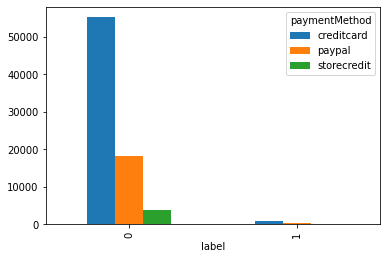

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_slice=data[['label','paymentMethod']]
slice_pivot=df_slice.pivot_table(index=["label"],columns=["paymentMethod"],aggfunc=np.size, fill_value=0)
p_chart=slice_pivot.plot.bar()

Usually the Fraud cases are less and occurred when payment methods are creditcard or paypal

In [5]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(data.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = data.drop('label',axis=1)
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify =y,test_size =0.3,random_state=1)


In [7]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = lr.predict(X_test)

print("Accuracy Score :",accuracy_score(y_pred, y_test))


Accuracy Score : 1.0


In [8]:
print(confusion_matrix(y_test, y_pred))

[[11599     0]
 [    0   168]]


Out of all the transaction in the dataset,168 transactions are correctly recognized as fraud, and 11599 transactions are recognized as not fraudulent transactions.